In [ ]:
!pip install datasets
!pip install torchvision
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.7/536.7 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.4/840.4 kB 7.5 MB/s eta 0:00:00


In [ ]:
import torch
import matplotlib.pyplot as plt
from datasets import load_dataset
import numpy as np
import torchvision
import torch.nn as nn
import torchmetrics

In [ ]:
tiny_imagenet = load_dataset('Maysee/tiny-imagenet', split='train')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/100000 [00:00<?, ? examples/s]

Generating valid split:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [ ]:
tiny_imagenet

Dataset({
    features: ['image', 'label'],
    num_rows: 100000
})

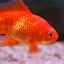

In [ ]:
# num=np.random.randint(0,10000)
tiny_imagenet[100]['image']

In [ ]:
# num_rows = tiny_imagenet.num_rows
num_rows=7500
images = []

for row in range(num_rows):
    image_pil = tiny_imagenet[row]['image']

    image_array = np.array(image_pil)

    images.append(image_array)

In [ ]:
len(images)

7500

In [ ]:
y=np.array(tiny_imagenet['label'])
np.unique(y)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
y.shape

(100000,)

In [ ]:
X=[]
label=[]
for i in range(0,len(images)):
  if images[i].shape==(64, 64, 3):
    X.append(images[i])
    label.append(y[i])


X=np.array(X)
label=np.array(label)

In [ ]:
X.shape,label.shape

((7466, 64, 64, 3), (7466,))

In [ ]:
#converting to tenosrs
X=torch.FloatTensor(X)
label=torch.LongTensor(label)

In [ ]:
X.shape,label.shape

(torch.Size([7466, 64, 64, 3]), torch.Size([7466]))

In [ ]:
from transformers import AutoFeatureExtractor, ResNetForImageClassification

feature_extractor = AutoFeatureExtractor.from_pretrained("microsoft/resnet-18")
model = ResNetForImageClassification.from_pretrained("microsoft/resnet-18",output_hidden_states=True)

preprocessor_config.json:   0%|          | 0.00/266 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/convnext/feature_extraction_convnext.py:28: FutureWarning: The class ConvNextFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ConvNextImageProcessor instead.
  warnings.warn(


config.json:   0%|          | 0.00/69.5k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

In [ ]:
print(model)

ResNetForImageClassification(
  (resnet): ResNetModel(
    (embedder): ResNetEmbeddings(
      (embedder): ResNetConvLayer(
        (convolution): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (normalization): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activation): ReLU()
      )
      (pooler): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    )
    (encoder): ResNetEncoder(
      (stages): ModuleList(
        (0): ResNetStage(
          (layers): Sequential(
            (0): ResNetBasicLayer(
              (shortcut): Identity()
              (layer): Sequential(
                (0): ResNetConvLayer(
                  (convolution): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
                  (normalization): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (activation): ReLU()
           

In [ ]:
for param in model.parameters():
    param.requires_grad = False

In [ ]:
import torch.nn as nn
num_classes=200
classifier=nn.Sequential(
    nn.Linear(1000,512),
    nn.ReLU(),
    nn.Linear(512,num_classes),
    nn.Softmax(dim=1)
)

In [ ]:
for param in classifier.parameters():
    param.requires_grad = True

In [ ]:
class custom_model(nn.Module):
  def __init__(self,model,classifier):
    super().__init__()
    self.m1=model
    self.m2=classifier
  def forward(self,x):
    x=self.m1(x).logits
    x=self.m2(x)

    return x

In [ ]:
new_model=custom_model(model,classifier)

In [ ]:
print(new_model)

custom_model(
  (m1): ResNetForImageClassification(
    (resnet): ResNetModel(
      (embedder): ResNetEmbeddings(
        (embedder): ResNetConvLayer(
          (convolution): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
          (normalization): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (activation): ReLU()
        )
        (pooler): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      )
      (encoder): ResNetEncoder(
        (stages): ModuleList(
          (0): ResNetStage(
            (layers): Sequential(
              (0): ResNetBasicLayer(
                (shortcut): Identity()
                (layer): Sequential(
                  (0): ResNetConvLayer(
                    (convolution): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
                    (normalization): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_st

In [ ]:
tt_p=sum(p.numel() for p in new_model.parameters() if p.requires_grad)
t_p=sum(p.numel() for p in new_model.parameters())
print(f'Total number of parameters:{t_p}, Total number of trainable parameters:{tt_p}')

Total number of parameters:12304624, Total number of trainable parameters:615112


In [ ]:
perm_indices = torch.randperm(X.size(0))
X = X[perm_indices]
label = label[perm_indices]

In [ ]:
X.shape

torch.Size([7466, 64, 64, 3])

In [ ]:
# X=X[:10000]
# label=label[:10000]
X_features=[]
# count=0
for img in X:
  # count=count+1
  # print(count)
  temp= feature_extractor(img, return_tensors="pt").pixel_values
  temp=torch.squeeze(temp)
  # print(temp.shape)
  X_features.append(temp)
X_features=torch.stack(X_features)

In [ ]:
X_features=X_features.to('cuda')
label=label.to('cuda')
new_model=new_model.to('cuda')


In [ ]:
X_features.shape,label.shape

(torch.Size([7466, 3, 224, 224]), torch.Size([7466]))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_features, label, test_size=0.01)

In [ ]:
X_train.shape,X_val.shape

(torch.Size([7391, 3, 224, 224]), torch.Size([75, 3, 224, 224]))

In [ ]:
from torch.utils.data import TensorDataset, DataLoader
train_dataset=TensorDataset(X_train,y_train)
val_dataset=TensorDataset(X_val,y_val)

In [ ]:
val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=True)
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [ ]:
len(train_dataloader)

116

In [ ]:
len(val_dataloader)

2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
epochs=40

criterion=nn.CrossEntropyLoss()
opt=torch.optim.Adam(new_model.parameters(), lr=0.0001)
accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=200).to('cuda')

for epoch in range(epochs):
  avg_train_acc=0
  avg_val_acc=0

  avg_train_loss=0
  avg_val_loss=0
  for batch in train_dataloader:

    X_batch, label_batch = batch
    # print(X_batch.shape)
    preds=new_model(X_batch)

    loss=criterion(preds,label_batch)
    acc=accuracy(preds,label_batch)
    avg_train_acc=avg_train_acc+acc
    avg_train_loss=avg_train_loss+loss

    opt.zero_grad()
    loss.backward()
    opt.step()


  with torch.no_grad():
    for batch in val_dataloader:
      X_val_batch, label_val_batch = batch


      val_preds=new_model(X_val_batch)
      val_loss=criterion(val_preds,label_val_batch)
      val_acc=accuracy(val_preds,label_val_batch)
      avg_val_acc=avg_val_acc+val_acc
      avg_val_loss=avg_val_loss+val_loss



  # print(f'Epoch {epoch}: Training Loss:  Training accuracy: , Validation Loss: Validation accuracy:')
  if epoch%5==0:
    print(f"| Epoch={epoch} | Training Accuracy={avg_train_acc/len(train_dataloader)} | Validation Accuracy={avg_val_acc/len(val_dataloader)} | Training Loss={avg_train_loss/len(train_dataloader)} | Validation_Loss={avg_val_loss/len(val_dataloader)} |")
    print('---------------------------------------------------------------------------------------------------------------------')


new_model=new_model.to('cpu')
torch.save(new_model,'/content/drive/MyDrive/ED Lab/finetuned_model.pt')


| Epoch=0 | Training Accuracy=0.4022047221660614 | Validation Accuracy=0.5071022510528564 | Training Loss=4.955549716949463 | Validation_Loss=4.828786849975586 |
---------------------------------------------------------------------------------------------------------------------
| Epoch=5 | Training Accuracy=0.6904677152633667 | Validation Accuracy=0.6384943127632141 | Training Loss=4.636655807495117 | Validation_Loss=4.6947221755981445 |
---------------------------------------------------------------------------------------------------------------------
| Epoch=10 | Training Accuracy=0.7120280861854553 | Validation Accuracy=0.6384943127632141 | Training Loss=4.611291885375977 | Validation_Loss=4.67996883392334 |
---------------------------------------------------------------------------------------------------------------------
| Epoch=15 | Training Accuracy=0.7676106691360474 | Validation Accuracy=0.8359375 | Training Loss=4.55690860748291 | Validation_Loss=4.487466812133789 |
------